## Tarea 7.9 ##

Use un polinomio interpolante para aproximar la integral de una gaussiana con $\sigma = 1$ y $\mu = 0$, entre $x = 0$ y $x = 1$. Compare con el resultado obtenido a partir de

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text{erf}(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

La función Gaussiana esta dada por
$$
\rho(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Dado los valores del problema donde $\sigma = 1 $ y $\mu = 0$ entre los rangos $x \in [0,1]$
entonces,

$$
\rho(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x)^2}{2}}
$$

Por lo tanto, lo que se nos pide es la aproximación a la integral de $\int\rho(x)dx$ entre los intervalos $x \in [0, 1]$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def gauss(x, mu, sigma): #función gaussiana para cualquier valor de sigma y mu
    
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)


In [5]:
def gaussiana(x): #simplificamos la función ya que los valores de varianza y el centro de la campana tienen valores
                  #fijos, sigma = 1 y mu = 0
    return np.exp(-(x)**2/(2))/np.sqrt(2*np.pi)                                                                                        

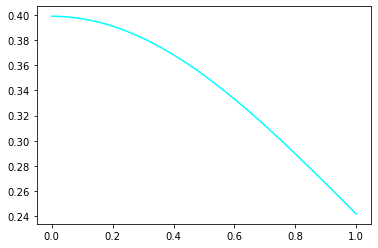

In [6]:
x = np.linspace(0, 1, 100)

plt.plot(x, gaussiana(x), color = 'cyan')
plt.show()

Ya sabiendo la forma de la función Gaussiana, buscamos un polinomio interpolante acorde a esta función. Para esto ocuparemos el polinomio de Lagrange visto en clases. Este polinomio está dado por:

$$
P(x) = \sum_{i = 0}^n f(x_i) L_{n,i}(x)\,,
$$


In [7]:
def lagrange(x, puntos):
    
    Lis = np.ones(len(puntos)) # polinomios
    fs = np.ones(len(puntos)) #funcion
    for i in range(len(puntos)): # llenar los espacios creados con ciclo for
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                xj = puntos[j][0]
                xi = puntos[i][0]
                Lis[i] *= (x - xj)/(xi - xj)
    
    return sum(fs*Lis)

Agregamos los puntos que son faciles de ver en la función de Gauss dada.

In [8]:
puntos1 = ([0, 0.4], [0.5, 0.35], [0.7, 0.31], [0.9, 0.266])
lagrange(1/2, puntos1)

0.35

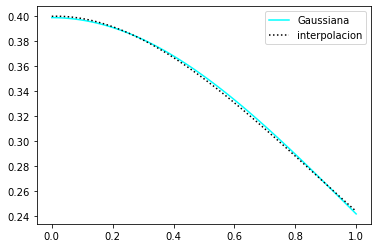

In [9]:
plt.plot(x, gaussiana(x), color = 'cyan', label = 'Gaussiana')
plt.plot(x, [lagrange(xi, puntos1) for xi in x], color = 'black', linestyle=':', label = 'interpolacion')
plt.legend()

Nuestro polinomio interpolante se acerca a la representación de la función de gauss. Ahora calculamos la integral del polinomio interpolado que encontramos para aproximarnos a la integral de la función Gaussiana.

In [10]:
from scipy import integrate
from scipy import special

Calcular los coeficientes que acompañan al polinomio e integrar el polinomio.

In [11]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [20]:
puntos = np.array([(0, 0.4), (0.5, 0.35), (0.7, 0.31), (0.9, 0.27)])
coef = difer(puntos)

In [21]:
def poly(x, coefs):
        
    return sum(coef[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

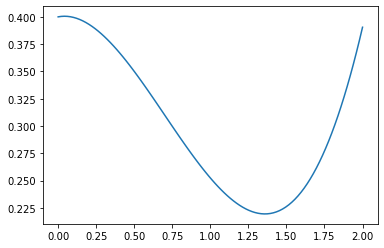

In [22]:
plt.plot(x, [poly(xi, coef) for xi in x])

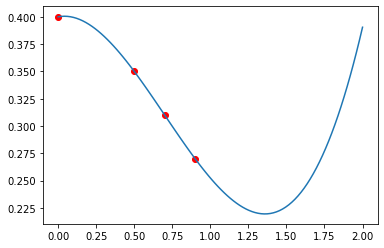

In [23]:
x = np.linspace(0, 2, 100)

plt.plot(x, [poly(xi, coef) for xi in x])
plt.scatter(puntos[:,0], puntos[:,1], color='red')

Lo que necesito es integrar mi funcion poly entre 0 y 1

In [16]:
integrate.quad(lambda x: poly(x, coef),0 , 1)

(0.34206349206349207, 3.797667647725734e-15)